<a href="https://colab.research.google.com/github/brunops1/Desafio-Neurotech/blob/main/Desafio_Neurotech_Bruno_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações e Importações

In [ ]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("desafio neurotech park") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [5]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
get_ipython().system_raw('./ngrok http 4050 &')

In [7]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[],"uri":"/api/tunnels"}


In [8]:
spark

In [9]:
from pyspark.sql import Row, DataFrame
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark.sql.functions import col, expr, lit, substring, concat, concat_ws, when, coalesce
from pyspark.sql import functions as F
from functools import reduce

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install sklearn # Instalação da biblioteca SKLearn (Modelos de Aprendizado de Maquinas)

In [11]:
import pandas as pd # Importando pandas para manipulação de Dados (DataFrame)

import numpy as np # Importando o numpy para operações matemáticas 

import seaborn as sns # Importando seaborn para análise gráfica
import matplotlib.pyplot as plt  # Importando o pyplot para análise gráfica

# Carregamento dos dados


In [10]:
import zipfile

In [ ]:

zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AC.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AL.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AM.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AP.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/BA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/CE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/DF.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/ES.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/GO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MG.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MS.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MT.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PB.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PI.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PR.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RJ.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RN.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RR.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RS.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SC.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SP.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/TO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')

BR_CONS

In [12]:
path = '/content/drive/MyDrive/Arquivos_Neurotech/AC/AC_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AL/AL_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AM/AM_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AP/AP_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/BA/BA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/CE/CE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/DF/DF_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/ES/ES_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/GO/GO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MA/MA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MG/MG_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MS/MS_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MT/MT_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PA/PA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PB/PB_CONS'
BR = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PE/PE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PI/PI_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PR/PR_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RJ/RJ_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RN/RN_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RO/RO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RR/RR_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RS/RS_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SC/SC_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SE/SE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SP/SP_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/TO/TO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)

In [13]:
BR_CONS.count()

15859

BR_DET

In [14]:
path = '/content/drive/MyDrive/Arquivos_Neurotech/AC/AC_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AL/AL_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AM/AM_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AP/AP_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/BA/BA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/CE/CE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/DF/DF_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/ES/ES_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/GO/GO_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MA/MA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MG/MG_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MS/MS_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MT/MT_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PA/PA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PB/PB_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PE/PE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PI/PI_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PR/PR_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RJ/RJ_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RN/RN_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RO/RO_DET'
BR = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RR/RR_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RS/RS_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SC/SC_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SE/SE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SP/SP_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/TO/TO_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)

In [15]:
BR_DET.count()

82625

# Análise Exploratória

In [16]:
BR_CONS.limit(5).toPandas()


,ID_EVENTO_ATENCAO_SAUDE,ID_PLANO,FAIXA_ETARIA,SEXO,CD_MUNICIPIO_BENEFICIARIO,PORTE,CD_MODALIDADE,NM_MODALIDADE,CD_MUNICIPIO_PRESTADOR,UF_PRESTADOR,TEMPO_DE_PERMANENCIA,ANO_MES_EVENTO,CD_CARATER_ATENDIMENTO,CD_TIPO_INTERNACAO,CD_REGIME_INTERNACAO,CD_MOTIVO_SAIDA,CID_1,CID_2,CID_3,CID_4,QT_DIARIA_ACOMPANHANTE,QT_DIARIA_UTI,IND_ACIDENTE_DOENCA,LG_VALOR_PREESTABELECIDO
0,2930664821,225240,30 a 39,Masculino,170210,PEQUENO,22,Cooperativa Médica,170210,TO,2,2019-10,2,1,1,12,S610,None,None,None,0,0,9,0
1,2920667396,215334,60 a 69,Feminino,172120,MÉDIO,24,Autogestão,170210,TO,8,2019-10,1,1,1,21,None,None,None,None,0,0,9,0
2,2987645747,215334,60 a 69,Masculino,172120,MÉDIO,24,Autogestão,170210,TO,3,2019-10,1,1,1,18,None,None,None,None,0,0,9,0
3,2920667393,215334,60 a 69,Feminino,172120,MÉDIO,24,Autogestão,170210,TO,8,2019-10,1,1,1,21,None,None,None,None,0,0,9,0
4,2854193497,238364,60 a 69,Feminino,170210,GRANDE,22,Cooperativa Médica,170210,TO,1,2019-10,1,1,1,12,Z853,None,None,None,0,0,9,0


In [17]:
BR_DET.limit(5).toPandas()

,ID_EVENTO_ATENCAO_SAUDE,UF_PRESTADOR,TEMPO_DE_PERMANENCIA,ANO_MES_EVENTO,CD_PROCEDIMENTO,CD_TABELA_REFERENCIA,QT_ITEM_EVENTO_INFORMADO,VL_ITEM_EVENTO_INFORMADO,VL_ITEM_PAGO_FORNECEDOR,IND_PACOTE,IND_TABELA_PROPRIA
0,2805733384,TO,2.0,2019-10,31309054,22,1,"2389,28",0,0,0
1,2805733384,TO,2.0,2019-10,40304108,22,1,"4,8",0,0,0
2,2805733384,TO,2.0,2019-10,031,63,17,"3375,53",0,0,0
3,2805733384,TO,2.0,2019-10,40307760,22,1,"4,8",0,0,0
4,2805733384,TO,2.0,2019-10,029,63,158,"1010,31",0,0,0


In [18]:
BR_CONS.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- ID_PLANO: string (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: string (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: string (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: string (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: string (nullable = true)
 |-- CD_TIPO_INTERNACAO: string (nullable = true)
 |-- CD_REGIME_INTERNACAO: string (nullable = true)
 |-- CD_MOTIVO_SAIDA: string (nullable = true)
 |-- CID_1: string (nullable = true)
 |-- CID_2: string (nullable = true)
 |-- CID_3: string (nullable = true)
 |-- CID_4: string (nullable = true)
 |-- QT_DIARIA_ACOMPANHANTE: string (nullable = true)
 |-- QT_DIARIA_UTI: string (nullabl

In [19]:
BR_DET.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: string (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_PROCEDIMENTO: string (nullable = true)
 |-- CD_TABELA_REFERENCIA: string (nullable = true)
 |-- QT_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_PAGO_FORNECEDOR: string (nullable = true)
 |-- IND_PACOTE: string (nullable = true)
 |-- IND_TABELA_PROPRIA: string (nullable = true)



In [20]:
from pyspark.sql.types import DoubleType, StringType, IntegerType
from pyspark.sql import functions as f

In [21]:
BR_CONS = BR_CONS \
  .withColumn("TEMPO_DE_PERMANENCIA" ,
              BR_CONS["TEMPO_DE_PERMANENCIA"]
              .cast(IntegerType()))   \
  .withColumn("QT_DIARIA_ACOMPANHANTE",
              BR_CONS["QT_DIARIA_ACOMPANHANTE"]
              .cast(IntegerType()))    \
  .withColumn("QT_DIARIA_UTI"  ,
              BR_CONS["QT_DIARIA_UTI"]
              .cast(IntegerType())) \


In [22]:
BR_CONS.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- ID_PLANO: string (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: string (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: string (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: integer (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: string (nullable = true)
 |-- CD_TIPO_INTERNACAO: string (nullable = true)
 |-- CD_REGIME_INTERNACAO: string (nullable = true)
 |-- CD_MOTIVO_SAIDA: string (nullable = true)
 |-- CID_1: string (nullable = true)
 |-- CID_2: string (nullable = true)
 |-- CID_3: string (nullable = true)
 |-- CID_4: string (nullable = true)
 |-- QT_DIARIA_ACOMPANHANTE: integer (nullable = true)
 |-- QT_DIARIA_UTI: integer (null

In [23]:
BR_CONS.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_CONS.columns]).show()

+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+-----+-----+-----+-----+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|FAIXA_ETARIA|SEXO|CD_MUNICIPIO_BENEFICIARIO|PORTE|CD_MODALIDADE|NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|CID_1|CID_2|CID_3|CID_4|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+-------------

In [24]:
BR_DET.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_DET.columns]).show()

+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|ID_EVENTO_ATENCAO_SAUDE|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_PROCEDIMENTO|CD_TABELA_REFERENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|IND_PACOTE|IND_TABELA_PROPRIA|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|                      0|           0|                  27|             0|              0|                   0|                      27|                      27|                     27|         0|                 0|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+

In [25]:
BR_CONS=BR_CONS.drop(*('CID_1',
                       'CID_2',
                       'CID_3',
                       'CID_4',))
BR_CONS.show()


+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|    FAIXA_ETARIA|     SEXO|CD_MUNICIPIO_BENEFICIARIO|  PORTE|CD_MODALIDADE|       NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+-------

In [27]:
BR_CONS = BR_CONS.dropna()

In [28]:
BR_DET = BR_DET.dropna()

In [29]:
BR_CONS.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_CONS.columns]).show()

+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|FAIXA_ETARIA|SEXO|CD_MUNICIPIO_BENEFICIARIO|PORTE|CD_MODALIDADE|NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+--------

In [30]:
BR_DET.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_DET.columns]).show()

+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|ID_EVENTO_ATENCAO_SAUDE|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_PROCEDIMENTO|CD_TABELA_REFERENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|IND_PACOTE|IND_TABELA_PROPRIA|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|                      0|           0|                   0|             0|              0|                   0|                       0|                       0|                      0|         0|                 0|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+

In [ ]:
plt.figure( figsize=(15,8) ) 
sns.heatmap(BR_CONS.corr(), annot=True)

In [ ]:
plt.figure(figsize=(20, 5), dpi=100)
plt.bar(BR_CONS["FAIXA_ETARIA"], BR_CONS["TEMPO_DE_PERMANENCIA"])
plt.ylabel('Tempo de permanencia')
plt.xlabel('Ano-Mes')
plt.title('Tempo de Permanência por faixa etária')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5), dpi=100)
plt.bar(df_AC_CONS_TEST["FAIXA_ETARIA"],df_AC_CONS_TEST["TEMPO_DE_PERMANENCIA"])
plt.ylabel('Tempo de permanencia')
plt.xlabel('Ano-Mes')
plt.title('Tempo de Permanncia por faixa etária')
plt.show()

# 2 - Pré-processamento de dados

In [ ]:
# Deletando a coluna que contém informação da data
del new_temperature_data['Date']

In [ ]:
# dividindo o dataset em variaveis dependentes e independentes 

x = new_temperature_data.iloc[:,:22]
y = new_temperature_data.iloc[:,22]


# determinando o formato de x e y.
print(x.shape)
print(y.shape)


(7588, 22)
(7588,)


In [ ]:
# Dividindo os dados em treinamento e teste 
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Determinando o formato de treino e teste dos dados 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5691, 22)
(5691,)
(1897, 22)
(1897,)


In [ ]:
# Fazendo preprocessamento dos dados com standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 3 - Modelando Dados

In [ ]:
# Importando o modelo de árvore aleatória regressor
from sklearn.ensemble import RandomForestRegressor
# Intanciando o modelo com 100 árvores de decisão
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Treinando os dados
rf.fit(x_train, y_train);

In [ ]:
# Aplicando os dados de teste no modelo para fazer as predições
predictions = rf.predict(x_test)

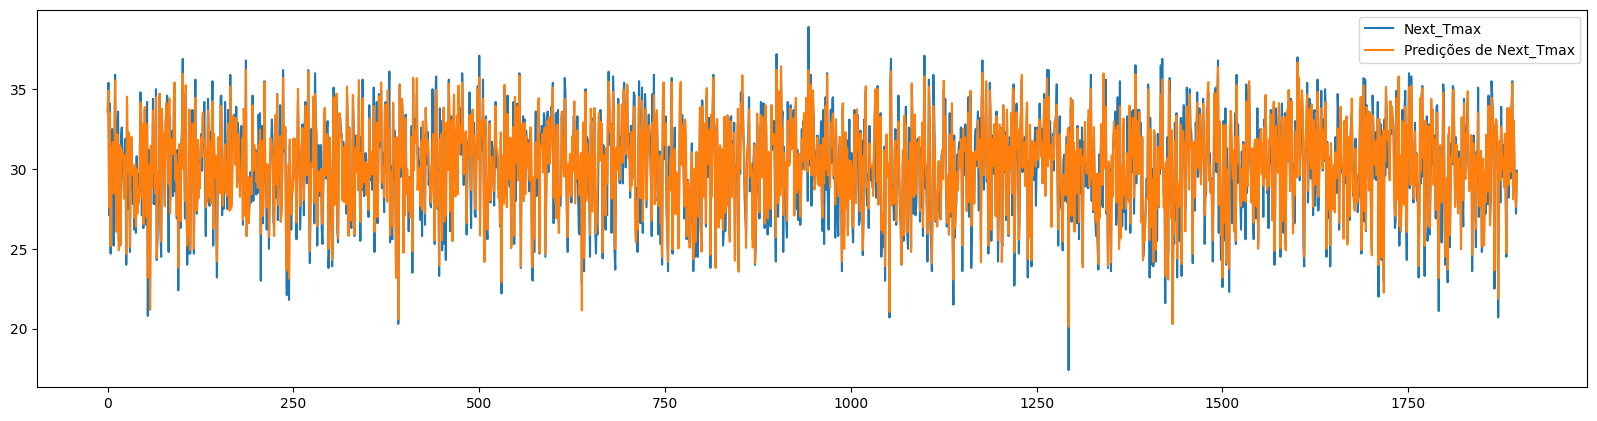

In [ ]:
#Verificando que as predições(Next_Tmax) estão muito próximas da variável Next_Tmax
plt.figure(figsize=(20,5), dpi=100)
plt.plot(y_test.to_numpy(),label="Next_Tmax")
plt.plot(predictions,label="Predições de Next_Tmax")
plt.legend()
plt.show()

In [ ]:
# Calculando as métricas
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7646868740115969
Mean Squared Error: 1.014640717448602
Root Mean Squared Error: 1.0072937592622135
